## Population and Sampling Analysis for Women's National Basketball Association

##### The current dataset analysis is an attempt to understand the difference between sampling and population analysis. 

The goal of the project is assort the data in accordance with dataquest questionairre and proceed with the analysis likewise.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
wnba = pd.read_csv("wnba.csv")

In [5]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [6]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [7]:
wnba.shape

(143, 32)

Let's now look at the assignments of both population and samples to allow clearer understanding of the play here.

In [8]:
#parameter is asserted for a population analysis
parameter = wnba["Games Played"].max()

In [9]:
parameter

32

In [11]:
#samples are used for a specific subset of the dataset to assess the whole of the population
sample = wnba["Games Played"].sample(30, random_state = 1)

In [12]:
sample

78     30
116    29
31     26
5      14
125    28
45     20
14      4
44     28
73     14
89     20
130    25
53     20
85     30
93     27
29     29
16     20
35      7
90      9
83     29
19     29
40     30
92     30
122    29
98     30
59     29
42     28
33     30
99     24
69     29
97     21
Name: Games Played, dtype: int64

As of the now, the information is not intuitive to differentiate between the sample and the parameter.

###### Hence, a question needs to be raised, is there an existence of a sampling error, which is the erroneous difference between the measures of the whole dataset and the subset of the data sampled.

In [13]:
#Asserting the maximum Games Played in the parameter and the sample helps to understand the possible sampling
#error caused.
statistic = sample.max()

In [14]:
statistic

30

There you go!

In [15]:
sampling_error = parameter - statistic

In [16]:
sampling_error

2

The sampling error of 2 shows that our samples are not as representative as the parameters of the entire population.

##### Hence to make our samples more representative, we'll have to use an appropriate method to sample our data to cover the population metrics as closely as possible.

_Therefore, we'll use the Simple Random Sampling Method for such an attempt._

We will use the points scored in the forthcoming attempt.

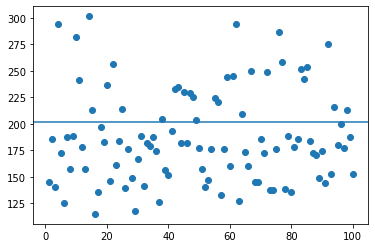

In [18]:
#Trial to make 100 samples of 10 values repetitively to allow comparison with the parameter average likewise.
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,101), sample_means)#displaying all the sample means as points between 1-100 on the x-axis.
plt.axhline(population_mean)#the mean of the population as the centrally passing line to establish comparisons.

In [38]:
#as visible, the max points in the sample is in the range of 0-20.
max_of_samples = max(sample_means)
max_of_samples

301.4

In [39]:
min_of_samples = min(sample_means)
min_of_samples

115.0

In [40]:
population_mean

201.7902097902098

As observable, the population mean is 201.7, whereas the sample means is distributed in the range of 115 - 301.4.

This distribution and large variation in the sample means shows that the sample data is not yet representative of the population data.

_Therefore, to solve this problem, the size of the sample can be varied, to better close in on the population data representation probability._

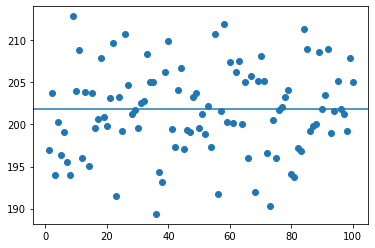

In [44]:
sample_means_100 = []
for i in range(100):
    sample_100 = wnba['PTS'].sample(100, random_state=i)
    sample_means_100.append(sample_100.mean())

plt.scatter(range(1,101), sample_means_100)#displaying all the sample means as points between 1-100 on the x-axis.
plt.axhline(population_mean)

In [45]:
max_of_samples_100 = max(sample_means_100)
max_of_samples_100

212.85833333333332

In [46]:
min_of_samples_100 = min(sample_means_100)
min_of_samples_100

189.375

There we go!

As evident, increasing the sample size increases the representative condition of the sample data average considerably.

_This establishes two facts about Simple Random Sampling:_

_1. It is not practical to use SRS for small amounts of sampling data._

_2. A large dataset reduces the variability in the sample dataset and allows it to stay representative accordingly._